# Exploratory Data Anaylsis (EDA) of Haberman Dataset

 The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

# Reference :
https://www.kaggle.com/gilsousa/habermans-survival-data-set

https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival

# Objective:
#### To predict whether a patient will survive after 5 years or not based upon the patient's age,his/her operation_year and the number of positive lymph nodes.



In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load Iris.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

In [97]:
# (Q) how many data-points and features?
print (haberman.shape)

(305, 4)


### Observation:
* The data set contains 305 rows & 4 columns 

In [98]:
#(Q) What are the column names in our dataset?
print (haberman.columns)
haberman.head()

Index(['30', '64', '1', '1.1'], dtype='object')


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


### Observation:
* The column name is missing 
* Have to rename the column name as names suggested in Kaggle for better understanding 

In [99]:
# (Q) How to rename headers to the columns in the data set.
haberman.columns = ['Age', 'Op_Year', 'axil_nodes', 'Surv_status'] 
haberman.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


### Observation:
* Attribute information as follows:
* The 1st column represent 'Age of patient at time of operation' 
* The 2nd column represent 'Patient's year of operation'
* The 3rd column represent 'Number of positive axillary nodes detected'
* the 4th column represent 'Survival status'
  * a) 1 = the patient survived 5 years or longer 
  * b) 2 = the patient died within 5 year

In [100]:
haberman['Surv_status'] = haberman['Surv_status'].map({1:"yes", 2:"no"})
haberman['Surv_status'] = haberman['Surv_status'].astype('category')
haberman.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,62,3,yes
1,30,65,0,yes
2,31,59,2,yes
3,31,65,4,yes
4,33,58,10,yes


In [101]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age            305 non-null int64
Op_Year        305 non-null int64
axil_nodes     305 non-null int64
Surv_status    305 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB


### Observation:
* There are 305 rows & 4 column.
* There are no missing values in this dataset. So there is no need to do data imputation.
* All the columns are non-null and int type

In [102]:
haberman["Surv_status"].value_counts()

yes    224
no      81
Name: Surv_status, dtype: int64

### Observation:
* There are two type of classes as follows:
* Class 1/Yes --> the patient survived 5 years or longer 
* Class 2/No --> the patient died within 5 year
* The haberman data set is an imbalance data set.Class 1 contains 224 counts & Class 2 contains 81

In [103]:
haberman.describe()

,Age,Op_Year,axil_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


### Observaion:
* Age of patient lies between 30 - 83, with meddian 52.
* Maximum numbers of +ve axil nodes is 52 
* Nearly 75% of the patients have less than 5 positive axil nodes and nearly 25% of the patients have no positive lymph nodes

# 1. BI-VARIATE ANALYSIS

## 2-D Scatter Plot

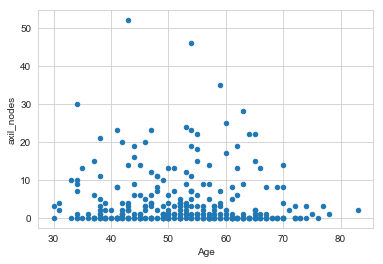

In [104]:
# lets plot plain scatter plot considering age and axillary nodes

haberman.plot(kind='scatter', x='Age', y='axil_nodes') ;
plt.show()

###  Observation:
* Most of the patients have zero axil nodes.

## 2-D Scatter Plot using seaborn

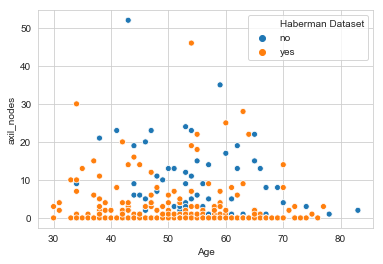

In [105]:
# 2-D Scatter plot with color-coding for each survival status type/class.
# Here 'sns' corresponds to seaborn.
fig, ax = plt.subplots()

g = sns.scatterplot(x="Age", y="axil_nodes", hue="Surv_status", data=haberman, ax=ax)
legend  = ax.legend()
legend.texts[0].set_text("Haberman Dataset")

### Observations:

* It seems most of the patients have 0 positive axil nodes detected.
* Here we clearly see that blue points are not seperated from orange points. So, by looking this 2-D scatter plot between 'Age' and 'axil_nodes' we cannot make any decision regarding patient's survival.
* Therefore, we have to check all combination/pair of features to make good classification/decision.
* Number of Combinations of features : 3C2 = 3 (excluding class-attribute 'Surv_status')
* Now, for these combination to analyse,Pair-Plot concept is used.

# Pair-Plots

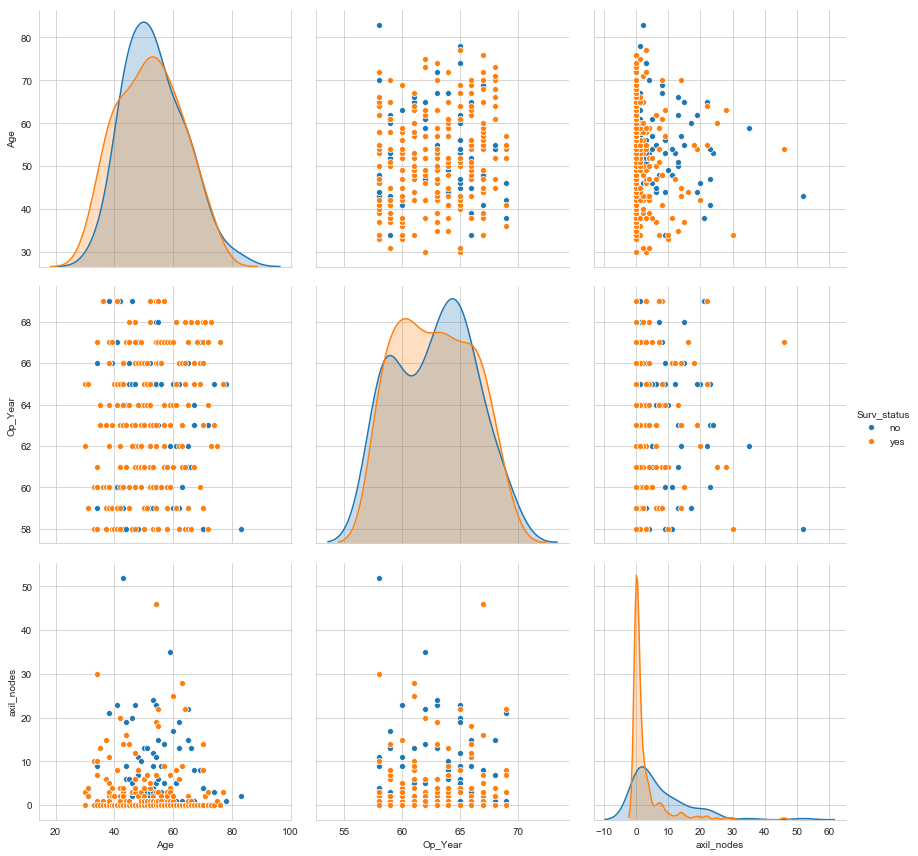

In [106]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Surv_status",height=4)
plt.show()
# The diagnol elements are PDFs for each feature.

###  Observations:

* axil_nodes VERSUS Age is the useful plot to atleast get the insight that most patient who survived have 0 axil nodes detected. (Axil node dose not depend on age)
* It is difficult to classify the data easily with the help of above plots as most of them are overlapping.

# UNIVARIATE ANALYSIS

## Histogram, PDF

### PDF for axil_nodes

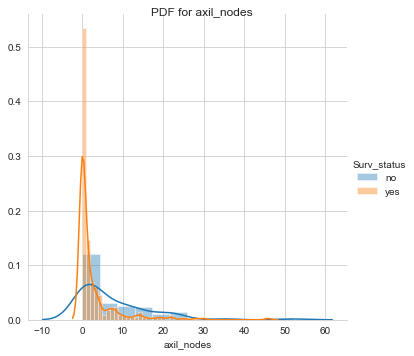

In [139]:
#fig, ax = plt.subplots()

g = sns.FacetGrid(haberman, hue="Surv_status", height=5);
g.map(sns.distplot, "axil_nodes") \
   .add_legend();
g.fig.suptitle('PDF for axil_nodes')
plt.show()



### PDF for Age

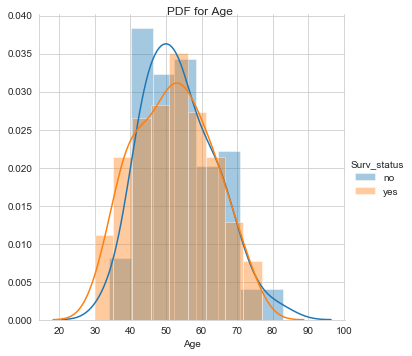

In [140]:
g = sns.FacetGrid(haberman, hue="Surv_status", height=5);
g.map(sns.distplot, "Age").add_legend();
g.fig.suptitle('PDF for Age')
plt.show();

### PDF for Op_Year

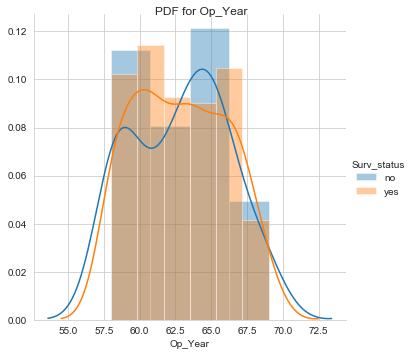

In [141]:
g = sns.FacetGrid(haberman, hue="Surv_status", height=5);
g.map(sns.distplot, "Op_Year").add_legend();
g.fig.suptitle('PDF for Op_Year')
plt.show();


###  Observation:

* From the above PDFs(Univariate analysis) both Age and Op_Year are not good features for useful insights as the distibution is more similar for both people who survived and also dead.

* axil_nodes is the only feature that is useful to know about the survival status of patients as there is difference between the distributions for both classes(labels). From that distibution we can infer that most survival patients have fallen in to zero axil_nodes.

* From the year distribution, we can observe that people who didnt survive suddenly rise and fall in between 1958 and 1960. More number of people are not survived in year of operation of 1965
* As number of positive axil_nodes increase the chance of survival decreases

# Draw PDF & CDF

### CDF for Op_Year column

Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
CDF: [0.20655738 0.29836066 0.38360656 0.45901639 0.55737705 0.6557377
 0.74754098 0.83934426 0.92131148 1.        ]


Text(0.5, 0, 'Op_Year')

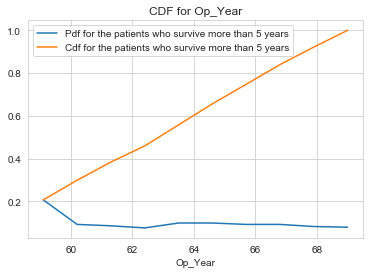

In [147]:
fig, ax = plt.subplots()

counts, bin_edges = np.histogram(haberman['Op_Year'], bins=10, density=True)
print("Bin Edges: {}".format(bin_edges))
pdf = counts/sum(counts)
print("PDF: {}".format(pdf))
cdf = np.cumsum(pdf)
print("CDF: {}".format(cdf))
plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who survive more than 5 years',
            'Cdf for the patients who survive more than 5 years'])
ax.set_title('CDF for Op_Year')

plt.xlabel('Op_Year')


### CDF for axil_nodes column

Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
CDF: [0.7704918  0.86885246 0.92786885 0.95409836 0.98360656 0.99016393
 0.99344262 0.99344262 0.99672131 1.        ]


Text(0.5, 0, 'axil_nodes')

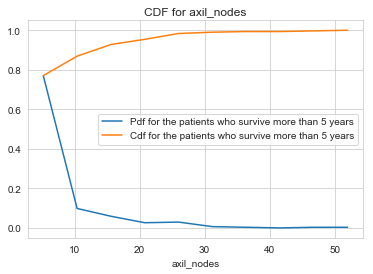

In [148]:
fig, ax = plt.subplots()
counts, bin_edges = np.histogram(haberman['axil_nodes'], bins=10, density=True)
print("Bin Edges: {}".format(bin_edges))
pdf = counts/sum(counts)
print("PDF: {}".format(pdf))
cdf = np.cumsum(pdf)
print("CDF: {}".format(cdf))
plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who survive more than 5 years',
            'Cdf for the patients who survive more than 5 years'])
ax.set_title('CDF for axil_nodes')
plt.xlabel('axil_nodes')

### CDF for Age column

Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
CDF: [0.04918033 0.13770492 0.28852459 0.46229508 0.64262295 0.77704918
 0.91147541 0.9704918  0.99344262 1.        ]


Text(0.5, 0, 'Age')

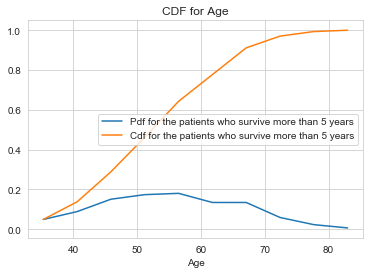

In [149]:
fig, ax = plt.subplots()
counts, bin_edges = np.histogram(haberman['Age'], bins=10, density=True)
print("Bin Edges: {}".format(bin_edges))
pdf = counts/sum(counts)
print("PDF: {}".format(pdf))
cdf = np.cumsum(pdf)
print("CDF: {}".format(cdf))
plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who survive more than 5 years',
            'Cdf for the patients who survive more than 5 years'])
ax.set_title('CDF for Age')
plt.xlabel('Age')

# Observation:

* As number of positive axil_nodes increase the chance of survival decreases.
* From the observation of CDFs, we can infer that patients above 36 axil_nodes detected can be considered as dead within 5 years. So,People having less number of axil_node can have survived.


# Median, Percentile, Quantile, IQR, MAD (Median Absolute deviation)

In [113]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman["axil_nodes"]))
#Median with an outlier
#print(np.median(haberman.groupby('Surv_status').mean().reset_index()))
#haberman.groupby('Surv_status')['axil_nodes'].describe()
haberman.groupby('Surv_status').describe()

#haberman.groupby('Surv_status')['Age'].describe()


Medians:
1.0


Age                                                      \
             count       mean        std   min   25%   50%   75%   max   
Surv_status                                                              
no            81.0  53.679012  10.167137  34.0  46.0  53.0  61.0  83.0   
yes          224.0  52.116071  10.937446  30.0  43.0  52.0  60.0  77.0   

            Op_Year             ...              axil_nodes            \
              count       mean  ...    75%   max      count      mean   
Surv_status                     ...                                     
no             81.0  62.827160  ...   65.0  69.0       81.0  7.456790   
yes           224.0  62.857143  ...   66.0  69.0      224.0  2.799107   

                                                  
                  std  min  25%  50%   75%   max  
Surv_status                                       
no           9.185654  0.0  1.0  4.0  11.0  52.0  
yes          5.882237  0.0  0.0  0.0   3.0  46.0  

[2 rows x 24 columns]

In [114]:
haberman.groupby('Surv_status').median()

,Age,Op_Year,axil_nodes
Surv_status,,,
no,53,63,4
yes,52,63,0


In [115]:
haberman.groupby('Surv_status').quantile(.1)

0.1,Age,Op_Year,axil_nodes
Surv_status,,,
no,42.0,58.0,0.0
yes,38.0,58.0,0.0


In [116]:
haberman.groupby('Surv_status').quantile([.1,.5,.7])

Age  Op_Year  axil_nodes
Surv_status                               
no          0.1  42.0     58.0         0.0
            0.5  53.0     63.0         4.0
            0.7  59.0     65.0         9.0
yes         0.1  38.0     58.0         0.0
            0.5  52.0     63.0         0.0
            0.7  58.0     65.0         2.0

# Box plot and Whiskers

### Box Plot With respect to axil_nodes column

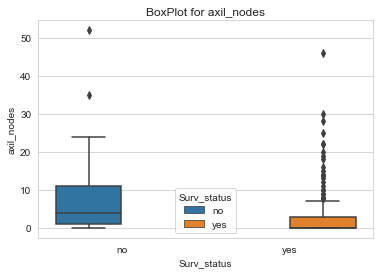

In [176]:
"""
Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1

"""

sns.boxplot(x='Surv_status',y='axil_nodes',hue='Surv_status', data=haberman).set_title('BoxPlot for axil_nodes');
plt.show()

### Box Plot With respect to Age column

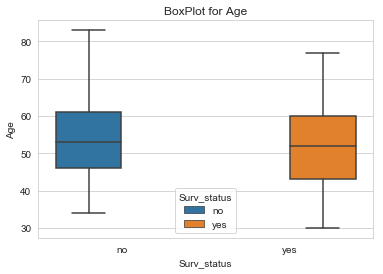

In [175]:
sns.boxplot(x='Surv_status',y='Age',hue='Surv_status', data=haberman).set_title('BoxPlot for Age');
plt.show()

### Box Plot With respect to Op_Year column

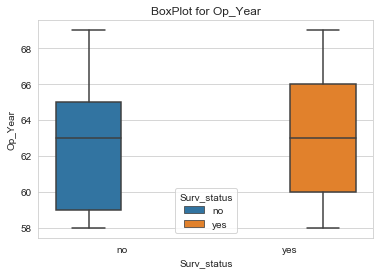

In [174]:
sns.boxplot(x='Surv_status',y='Op_Year',hue='Surv_status', data=haberman).set_title('BoxPlot for Op_Year')
plt.show()

In [120]:
haberman.groupby('Surv_status').mean().reset_index()

,Surv_status,Age,Op_Year,axil_nodes
0,no,53.679012,62.827160,7.456790
1,yes,52.116071,62.857143,2.799107


# Violin plots

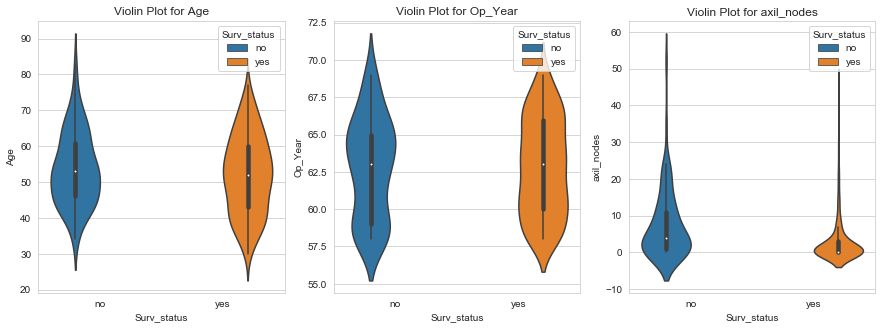

In [236]:
#Violin plot is the combination of box plot and probability density function.
#Denser regions of the data are fatter, and sparser ones thinner in a violin plot.

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    sns.violinplot( x='Surv_status', y=feature, data=haberman, ax=axes[idx], hue = 'Surv_status').set_title('Violin Plot for '+feature)
plt.show()

# Observations:
* overlap of data points is less compared to other features, but overlap still exist thus it is difficult to set a threshold for axil_nodes which will differentiate both class of patients

* About 50% of the patients who survived had no axil_nodes

* As number of positive axil_nodes increase the chance of survival decreases

* Small percentage of patients who had no positive axil_nodes died within 5 years of operation , thus absence of axil_nodes cannot always guarente survival

# Contour plot

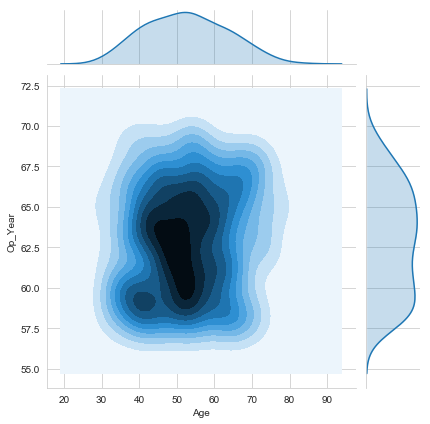

In [178]:

sns.jointplot(x="Age", y="Op_Year", data=haberman, kind="kde");
plt.show()

### Observation:
* There are more number of people who have undergone operation during the year 1959 - 1964 period and between the ages 46 - 59.

# Final Conclusions:

* There are 305 observations with 4 features in the data set.
* The column name is missing 
* Rename the column name as names suggested in Kaggle for better understanding 
* It is an imbalanced dataset with-
           a. 224 patients belonging to status 1, those who survived morethen 5 years.
           b. 81 patients belonging to status 2, those who survived less than 5 years.
           
* Using scatter plot(Bi-variate analysis) -
           a. Most of the patients have zero axil nodes.
    
* Using Pair-plot concept(Bi-variate analysis)-
           a. axil_nodes VERSUS Age is the useful plot to atleast get the insight that most patient who survived
           have 0 axil nodes detected. (Axil node dose not depend on age)
           b. It is difficult to classify the data easily with the help of above plots as most of them are
           overlapping.
                     
* Using PDFs & CDF (Uni-variate Analysis)-
           a. From the above PDFs(Univariate analysis) both Age and Op_Year are not good features for useful
           insights as the distibution is more similar for both people who survived and also dead.
           b. axil_nodes is the only feature that is useful to know about the survival status of patients as there
           is difference between the distributions for both classes(labels). 
           c. From that distibution we can infer that most survival patients have fallen in to zero axil_nodes.
           d. As number of positive axil_nodes increase the chance of survival decreases.
           e. From the observation of CDFs, we can infer that patients above 36 axil_nodes detected can be
           considered as dead within 5 years. So,People having less number of axil_node can have survived

             
* The mean(average) of axil_nodes is more for people who died within 5 years than people who have survived for more than 5 years.

* Using Box plot and Violin plots-
           a. overlap of data points is less compared to other features, but overlap still exist thus it is 
           difficult to set a threshold for axil_nodes which will differentiate both class of patients.           
           b. About 50% of the patients who survived had no axil_nodes
           c. As number of positive axil_nodes increase the chance of survival decreases.
           d. Small percentage of patients who had no positive axil_nodes died within 5 years of operation , thus 
           absence of axil_nodes cannot always guarente survival.
           
* Using Contour plot-
           a. There are more number of people who have undergone operation during the year 1959 - 1964 period and
           between the ages 46 - 59.

Done and Submitted by-

BISWAJIT SAMAL

Phone number: 9748888983

                                                                                                       Thank You